## [데이터기반 시각화]
- 데이터 : 남북한발전전력량.xlsx
- 남북한 수력발전전력량에 대한 시각화

(1) 모듈 로딩 <hr>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


(2) 데이터 준비 <hr>

In [2]:
file = '../DATA/남북한발전전력량.xlsx'


- 실제 데이터 파일 확인 결과
- 첫번째 행은 컬럼명 데이터
- 첫번째와 두번째 컬럼을 행 인덱스 사용으로 적합
- 입력값이 없는 쉘에 '-' 채워져 있음 => isnull()/isnu()로는 결측치 체크 X
    * 삭제하지 않고 대체로 처리 => 대체값 0

(3) 데이터 저장 : EXCEL => DataFrame

In [3]:
korpowerDF = pd.read_excel(file, index_col=[0, 1])


(4) 데이터 확인

 - (4-1) 데이터 타입과 실제 데이터 비교
    * '-' 데이터를 '0'으로 변경
    * object 타입을 uint16 변경

In [4]:
korpowerDF.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9 entries, ('남한', '합계') to ('북한', '원자력')
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1990    9 non-null      object
 1   1991    9 non-null      object
 2   1992    9 non-null      object
 3   1993    9 non-null      object
 4   1994    9 non-null      object
 5   1995    9 non-null      object
 6   1996    9 non-null      object
 7   1997    9 non-null      object
 8   1998    9 non-null      object
 9   1999    9 non-null      object
 10  2000    9 non-null      object
 11  2001    9 non-null      object
 12  2002    9 non-null      object
 13  2003    9 non-null      object
 14  2004    9 non-null      object
 15  2005    9 non-null      object
 16  2006    9 non-null      object
 17  2007    9 non-null      object
 18  2008    9 non-null      object
 19  2009    9 non-null      object
 20  2010    9 non-null      object
 21  2011    9 non-null      object
 22  2012   

In [5]:
korpowerDF.head()


1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393   
          수력        64    51    49    60    41    55    52    54    61    61   
          화력       484   573   696   803  1022  1122  1264  1420  1195  1302   
          원자력      529   563   565   581   587   670   739   771   897  1031   
          신재생        -     -     -     -     -     -     -     -     -     -   

                  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
전력량 (억㎾h) 발전 전력별  ...                                                         
남한        합계      ...  4031  4224  4336  4747  4969  5096  5171  5220  5281   
          수력      ...    50    56    56    65    78    77    84    78    58   
          화력      ...  2551  2658  2802  3196  3343  3430  3581  3427  3402   
          원자력     ...  1429  1510  1478  1486  1547  1503  1388  1564  1648   
          신재생     ...     -     -     -     -     -    86   118   151   173   

                  2016  
전력량 (억㎾h) 발전 전력별        
남한        합계      5404  
          수력        66  
          화력      3523  
          원자력     1620  
          신재생      195  

[5 rows x 27 columns]

- (4-2) 인덱스와 컬럼 속성 확인

In [6]:
print(korpowerDF.index, korpowerDF.columns, sep='\n\n')


MultiIndex([('남한',  '합계'),
            ('남한',  '수력'),
            ('남한',  '화력'),
            ('남한', '원자력'),
            ('남한', '신재생'),
            ('북한',  '합계'),
            ('북한',  '수력'),
            ('북한',  '화력'),
            ('북한', '원자력')],
           names=['전력량 (억㎾h)', '발전 전력별'])

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')


(5) 데이터 전처리

- (5-1) 데이터 자료형 변환

In [11]:
# '-' => '0'
korpowerDF2 = korpowerDF.replace('-', '0')
korpowerDF2.tail()


1990 1991 1992 1993 1994 1995 1996 1997 1998 1999  ... 2007  \
전력량 (억㎾h) 발전 전력별                                                    ...        
남한        신재생       0    0    0    0    0    0    0    0    0    0  ...    0   
북한        합계      277  263  247  221  231  230  213  193  170  186  ...  236   
          수력      156  150  142  133  138  142  125  107  102  103  ...  133   
          화력      121  113  105   88   93   88   88   86   68   83  ...  103   
          원자력       0    0    0    0    0    0    0    0    0    0  ...    0   

                 2008 2009 2010 2011 2012 2013 2014 2015 2016  
전력량 (억㎾h) 발전 전력별                                               
남한        신재생       0    0    0    0   86  118  151  173  195  
북한        합계      255  235  237  211  215  221  216  190  239  
          수력      141  125  134  132  135  139  130  100  128  
          화력      114  110  103   79   80   82   86   90  111  
          원자력       0    0    0    0    0    0    0    0    0  

[5 rows x 27 columns]

In [10]:
# object => uint16
korpowerDF2 = korpowerDF2.astype('uint16')
korpowerDF2.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9 entries, ('남한', '합계') to ('북한', '원자력')
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1990    9 non-null      uint16
 1   1991    9 non-null      uint16
 2   1992    9 non-null      uint16
 3   1993    9 non-null      uint16
 4   1994    9 non-null      uint16
 5   1995    9 non-null      uint16
 6   1996    9 non-null      uint16
 7   1997    9 non-null      uint16
 8   1998    9 non-null      uint16
 9   1999    9 non-null      uint16
 10  2000    9 non-null      uint16
 11  2001    9 non-null      uint16
 12  2002    9 non-null      uint16
 13  2003    9 non-null      uint16
 14  2004    9 non-null      uint16
 15  2005    9 non-null      uint16
 16  2006    9 non-null      uint16
 17  2007    9 non-null      uint16
 18  2008    9 non-null      uint16
 19  2009    9 non-null      uint16
 20  2010    9 non-null      uint16
 21  2011    9 non-null      uint16
 22  2012   

(6) 데이터 분석 작업

- 남북한의 수력발전량 비교하기

In [13]:
# 수력발전량 행 데이터 추출
waterDF = korpowerDF2.xs('수력', level=1)
waterDF.shape


(2, 27)

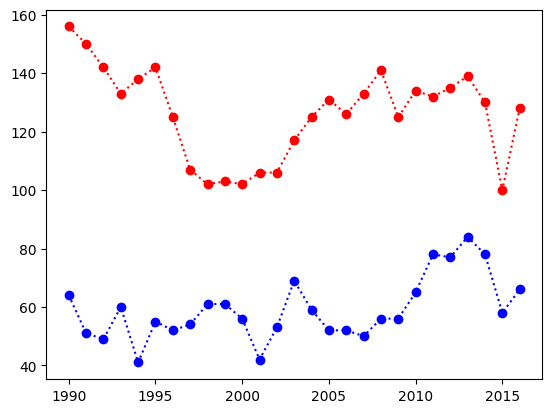

In [27]:
x = [int(d) for d in waterDF.columns]
ret = plt.plot(x, waterDF.loc['남한'], 'bo:', x, waterDF.loc['북한'], 'ro:')
